In [ ]:
import os
import random
from fb_qualities import find_fb_qualities
from pprint import pprint
from IPython.display import Audio
from tqdm import tqdm

In [ ]:
base_dir = "D:\soundofai\\all_nsynth_audio"
files = [x for x in os.listdir(base_dir) if x.lower().endswith(".wav")]
print(len(files))

In [ ]:
raw_values = {
    "file": [],
    "pitch": []
}

for i, file in tqdm(enumerate(files)):
    _, pitch, _ = file.split("-")
    pitch = int(pitch)
    if 36 <= pitch <= 84:
        file_path = os.path.join(base_dir, file)
        _, raw = find_fb_qualities(file_path, raw_values=True,
                                   return_all=True)
        for key, value in raw.items():
            if f"{key}_ratio" not in raw_values:
                raw_values[f"{key}_ratio"] = []
            if f"{key}_band_amp" not in raw_values:
                raw_values[f"{key}_band_amp"] = []
            if f"{key}_total_amp" not in raw_values:
                raw_values[f"{key}_total_amp"] = []
            raw_values[f"{key}_ratio"].append(value["ratio"])
            raw_values[f"{key}_band_amp"].append(value["band_amp"])
            raw_values[f"{key}_total_amp"].append(value["total_amp"])
        raw_values["file"].append(file)
        raw_values["pitch"].append(pitch)

In [ ]:
import pandas as pd

df = pd.DataFrame(raw_values)
df.head()

In [ ]:
df.to_csv("fb_ratios.csv")

In [ ]:
# Get just the found qualities back
file_path = os.path.join(base_dir, random.choice(files))
found_qualities, raw_values = find_fb_qualities(file_path)

Audio(file_path, rate=16000)

In [ ]:
pprint(found_qualities)
print("=" * 20)
pprint(raw_values)

In [ ]:
# or get raw values along with the result
found_qualities, raw_values = find_fb_qualities(file_path,
                                                raw_values=True)

pprint(found_qualities)
print("=" * 20)
pprint(raw_values)

In [ ]:
# or get raw values of all the fb qualities along with the result
found_qualities, raw_values = find_fb_qualities(file_path,
                                                raw_values=True,
                                                return_all=True)

pprint(found_qualities)
print("=" * 20)
pprint(raw_values)


In [ ]:
import shutil

target_dir = "D:\soundofai\\blindtest"
gt = "D:\soundofai\\blindtest\\gt.txt"

f = open(gt, "w")

for i in range(0, 25):
    fn = random.choice(files)
    file_path = os.path.join(base_dir, fn)
    found_qualities, _ = find_fb_qualities(file_path)
    found_qualities_str = ",".join(found_qualities)
    f.write(f"{i}:{fn}:{found_qualities_str}\n")
    target_path = os.path.join(target_dir, f"{i}.wav")
    shutil.copy(file_path, target_path)

f.close()

In [1]:
import numpy as np
import fb_qualities
import os

In [2]:
base_dir = "D:\soundofai\\all_nsynth_audio"
files = [x for x in os.listdir(base_dir) if x.lower().endswith(".wav")]

In [76]:
f = np.random.choice(files)
file_path = os.path.join(base_dir, f)

In [4]:
import matplotlib.pyplot as plt

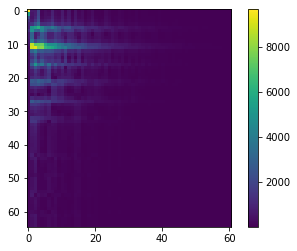

In [92]:
_, a = wavfile.read(file_path)
s = fb_qualities.get_spectrogram(a)

max_time = s.shape[-1]
max_time = int(max_time / 2)
s = s[:, :max_time]

plt.imshow(s)
plt.colorbar();

In [93]:
import tensorflow as tf

In [94]:
s_composite = tf.reduce_mean(s, axis=-1)

In [95]:
s_range = len(s_composite)

PI = np.pi

timestep_to_angle = lambda t: (t/s_range) * PI

circle_range = [timestep_to_angle(i) for i in range(0, s_range)]
circle = np.sin(circle_range)

In [96]:
result = s_composite * circle

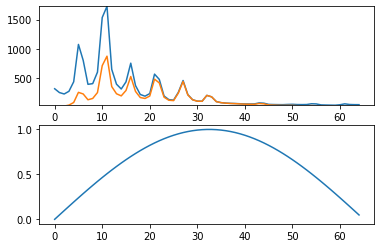

In [97]:
ylim = [np.min(s_composite), np.max(s_composite)]

plt.subplot(2, 1, 1)
plt.plot(s_composite)
plt.plot(result)
plt.ylim(ylim)

plt.subplot(2, 1, 2)
plt.plot(circle)

plt.show()

In [98]:
a.shape

(64000,)

In [99]:
a.mean()

-1.465359375

In [100]:
from scipy.io import wavfile

In [101]:
sr, audio = wavfile.read(file_path)

In [102]:
audio.shape

(64000,)

In [103]:
np.mean(audio)

-1.465359375

In [88]:
np.mean(a)

-4.4719218e-05

In [90]:
audio.dtype

dtype('int16')

In [91]:
a.dtype

dtype('float32')